In [2]:
using Pkg
Pkg.activate(".")
Pkg.instantiate()
# Pkg.add("DICOM")
# Pkg.add("Images")
# Pkg.add("NIfTI")
# Pkg.add("Plots")

  Activating project at `g:\桌面\2022 Fall\cs284A\Project`


In [3]:
using DICOM
using Images
using Printf
using NIfTI
using Plots

In [4]:
data_dir = raw"D:\RSNA-2022-dataset"
mask_dir = raw"D:\RSNA-2022-dataset\segmentations"
train_image_dir = raw"D:\RSNA-2022-dataset\train_images"
out_dir = raw"G:\桌面\2022 Fall\cs284A\Project\Compressed_data"

"G:\\桌面\\2022 Fall\\cs284A\\Project\\Compressed_data"

In [5]:
compress_factor = 8
compressed_size_x_y = (trunc(Int, 512/compress_factor), trunc(Int, 512/compress_factor))

(64, 64)

## Compress train images by compress_factor

In [24]:
train_file_dirs = []
for f in readdir(train_image_dir, join=true)
    push!(train_file_dirs, f)
end

In [7]:
# jpeg_lossless_files = []
# # Threads.@threads for i = 1:size(train_file_dirs)[1]
# threads = 4
# Threads.@threads for t = 1 : threads
#     # for i = t : threads : t
#     for i = t : threads : size(train_file_dirs)[1]
#         curr_images_dcm_data_array = dcmdir_parse(train_file_dirs[i])
#         curr_image_name = curr_images_dcm_data_array[1][(0x0020, 0x000d)]
#         if size(curr_images_dcm_data_array[1][(0x7fe0, 0x0010)])[1] != 512
#             push!(jpeg_lossless_files, curr_image_name)
#             println(curr_image_name)
#         else
#             num_slices = size(curr_images_dcm_data_array)[1] 
#             z_length = trunc(Int, num_slices/compress_factor)
#             slices = zeros(num_slices, compressed_size_x_y[1], compressed_size_x_y[2])
#             compressed_slices = zeros(z_length, compressed_size_x_y[1], compressed_size_x_y[2])
#             # compress x, y
#             Threads.@threads for slice = 1 : num_slices
#                 curr_slice_pixel_array = curr_images_dcm_data_array[slice][(0x7fe0, 0x0010)]
#                 # println("$curr_image_name, slice = $slice, size = $(size(curr_slice_pixel_array)))")
#                 slices[slice, :, :] = imresize(curr_slice_pixel_array, compressed_size_x_y)
#             end
#             # compress z
#             Threads.@threads for j = 1 : compressed_size_x_y[2]
#                 compressed_slices[:, :, j] = imresize(slices[:, :, j], z_length, compressed_size_x_y[1])
#             end
#             # # save as jpg THIS WILL LOSE DEPTH INFORMATION
#             # for z = 1 : z_length
#             #     curr_path = @sprintf "%s\\train_images\\%s\\%d.png" out_dir curr_image_name z
#             #     curr_min = minimum(compressed_slices[z, :, :])
#             #     curr_max = maximum(compressed_slices[z, :, :])
#             #     for j = 1 : size(compressed_slices[z, :, :])[1]
#             #         for k = 1 :size(compressed_slices[z, :, :])[2]
#             #             compressed_slices[z, j, k] = (compressed_slices[z, j, k] - curr_min)/(curr_max - curr_min)
#             #         end
#             #     end
#             #     gimg = colorview(Gray, compressed_slices[z, :, :])
#             #     save(curr_path, gimg)
#             # end
#             # save as txt files
#             Threads.@threads for z = 1 : z_length
#                 curr_dir = @sprintf "%s\\train_images\\%s" out_dir curr_image_name
#                 curr_path = @sprintf "%s\\%d.txt" curr_dir z
#                 isdir(curr_dir) || mkdir(curr_dir)
#                 open(curr_path, "w") do file
#                     write(file, compressed_slices[z, :, :])
#                 end
#             end
#         end
#         println(i)
#         flush(stdout)
#     end
# end

1.2.826.0.1.3680043.10014
3
2
1
7
4
5
11
6
1.2.826.0.1.3680043.1010
10
8
9
15
14
12
13
1.2.826.0.1.3680043.10360
17
18
16
19
20
22
21
26
23
24
1.2.826.0.1.3680043.10541
25
1.2.826.0.1.3680043.10606
27
30
31
29
1.2.826.0.1.3680043.10678
35
34
1.2.826.0.1.3680043.10639
33
28
1.2.826.0.1.3680043.10725
38
1.2.826.0.1.3680043.1071
37
1.2.826.0.1.3680043.10633
32
39
42
36
41
43
46
47
45
51
50
1.2.826.0.1.3680043.1107
54
55
40
49
58
44
62
1.2.826.0.1.3680043.11281
66
59
48
53
52
1.2.826.0.1.3680043.11116
57
63
70
56
1.2.826.0.1.3680043.11192
61
67
74
65
71
60
1.2.826.0.1.3680043.11377
69
78
1.2.826.0.1.3680043.1151
75
1.2.826.0.1.3680043.11245
64
73
1.2.826.0.1.3680043.11645
82
79
1.2.826.0.1.3680043.11605
77
68
86
83
72
90
87
94
1.2.826.0.1.3680043.11644
81
91
76
98
80
95
1.2.826.0.1.3680043.11834
99
84
102
88
1.2.826.0.1.3680043.11718
92
96
100
85
103
1.2.826.0.1.3680043.11899
104
1.2.826.0.1.3680043.1195
106
107
89
111
108
1.2.826.0.1.3680043.12031
110
1.2.826.0.1.3680043.12095
112
115
1.2

In [ ]:
# "1.2.826.0.1.3680043.10014"
#  "1.2.826.0.1.3680043.1010"
#  "1.2.826.0.1.3680043.10360"
#  "1.2.826.0.1.3680043.10541"
#  "1.2.826.0.1.3680043.10606"
#  "1.2.826.0.1.3680043.10678"
#  "1.2.826.0.1.3680043.10639"
#  "1.2.826.0.1.3680043.10725"
#  "1.2.826.0.1.3680043.1071"
#  "1.2.826.0.1.3680043.10633"
#  "1.2.826.0.1.3680043.1107"
#  "1.2.826.0.1.3680043.11281"
#  "1.2.826.0.1.3680043.11116"

In [10]:
# save jpeg lossless list to txt
open("jpeg_lossless_list.txt", "w") do f
    for file in jpeg_lossless_files
        temp = @sprintf "%s\n" file
        write(f, temp)
    end
end

## Compress train images (with JPEG_LS and got decoded by Python) by compress_factor

In [6]:
train_file_jpeg_lossless_dirs = []
f = open(raw"G:\桌面\2022 Fall\cs284A\Project\jpeg_lossless_list_org.txt", "r")
for line in readlines(f)
    curr_dir = train_image_dir * "\\" * line
    push!(train_file_jpeg_lossless_dirs, curr_dir) 
end
close(f)

In [8]:
error_files = []
threads = 8
Threads.@threads for t = 1 : threads
    for i = t : threads : size(train_file_jpeg_lossless_dirs)[1]
        curr_images_dcm_data_array = dcmdir_parse(train_file_jpeg_lossless_dirs[i])
        curr_image_name = curr_images_dcm_data_array[1][(0x0020, 0x000d)]
        if size(curr_images_dcm_data_array[1][(0x7fe0, 0x0010)])[1] != 512
            push!(error_files, curr_image_name)
            println(curr_image_name)
        else
            num_slices = size(curr_images_dcm_data_array)[1] 
            z_length = trunc(Int, num_slices/compress_factor)
            slices = zeros(num_slices, compressed_size_x_y[1], compressed_size_x_y[2])
            compressed_slices = zeros(z_length, compressed_size_x_y[1], compressed_size_x_y[2])
            # compress x, y
            Threads.@threads for slice = 1 : num_slices
                curr_slice_pixel_array = curr_images_dcm_data_array[slice][(0x7fe0, 0x0010)]
                # println("$curr_image_name, slice = $slice, size = $(size(curr_slice_pixel_array)))")
                slices[slice, :, :] = imresize(curr_slice_pixel_array, compressed_size_x_y)
            end
            # compress z
            Threads.@threads for j = 1 : compressed_size_x_y[2]
                compressed_slices[:, :, j] = imresize(slices[:, :, j], z_length, compressed_size_x_y[1])
            end
            # # save as jpg THIS WILL LOSE DEPTH INFORMATION
            # for z = 1 : z_length
            #     curr_path = @sprintf "%s\\train_images\\%s\\%d.png" out_dir curr_image_name z
            #     curr_min = minimum(compressed_slices[z, :, :])
            #     curr_max = maximum(compressed_slices[z, :, :])
            #     for j = 1 : size(compressed_slices[z, :, :])[1]
            #         for k = 1 :size(compressed_slices[z, :, :])[2]
            #             compressed_slices[z, j, k] = (compressed_slices[z, j, k] - curr_min)/(curr_max - curr_min)
            #         end
            #     end
            #     gimg = colorview(Gray, compressed_slices[z, :, :])
            #     save(curr_path, gimg)
            # end
            # println(curr_image_name)
            # save as txt files
            Threads.@threads for z = 1 : z_length
                curr_dir = @sprintf "%s\\new\\train_images\\%s" out_dir curr_image_name
                curr_path = @sprintf "%s\\%d.txt" curr_dir z
                isdir(curr_dir) || mkdir(curr_dir)
                open(curr_path, "w") do file
                    write(file, compressed_slices[z, :, :])
                end
            end
        end
        println(i)
        flush(stdout)
        # break
    end
end

2
1
6
8
7
3
5
4
11
12
15
14
9
10
19
17
13
16
23
22
20
25
18
27
21
30
28
31
24
29
32
35
38
26
36
46
37
33
43
44
39
54
51
34
40
62
52
41
47
45
42
48
53
70
49
55
60
56
57
59
50
61
78
63
58
65
68
64
66
67
69
86
73
71
77
75
72
94
79
81
76
102
80
83
110
85
84
87
74
88
91
118
92
89
95
82
99
93
126
100
97
96
107
105
104
103
108
101
90
112
115
113
111
116
98
134
121
123
106
120
124
109
129
119
142
131
114
117
137
128
127
150
139
132
136
145
122
125
147
158
130
133
135
153
140
144
155
166
161
138
148
141
152
169
143
163
146
149
156
177
160
174
151
164
182
168
159
154
171
157
176
185
184
190
162
193
172
165
179
167
192
201
170
180
178
187
175
173
198
209
200
188
181
186
206
195
183
189
217
196
194
203
214
191
208
225
211
199
202
233
204
222
197
219
216
212
207
241
227
210
205
235
230
218
224
215
220
243
249
232
213
238
223
226
257
221
228
246
240
251
231
234
236
229
248
239
242
265
254
259
256
250
237
273
262
281
264
247
258
267
245
1.2.826.0.1.3680043.22678
244
270
266
272
278
275
253
252
255
28

In [9]:
error_files

27-element Vector{Any}:
 "1.2.826.0.1.3680043.22678"
 "1.2.826.0.1.3680043.27426"
 "1.2.826.0.1.3680043.2823"
 "1.2.826.0.1.3680043.29287"
 "1.2.826.0.1.3680043.30539"
 "1.2.826.0.1.3680043.2920"
 "1.2.826.0.1.3680043.27607"
 "1.2.826.0.1.3680043.31328"
 "1.2.826.0.1.3680043.28711"
 "1.2.826.0.1.3680043.31580"
 "1.2.826.0.1.3680043.29952"
 "1.2.826.0.1.3680043.6145"
 "1.2.826.0.1.3680043.4075"
 ⋮
 "1.2.826.0.1.3680043.9145"
 "1.2.826.0.1.3680043.3121"
 "1.2.826.0.1.3680043.6200"
 "1.2.826.0.1.3680043.8385"
 "1.2.826.0.1.3680043.6404"
 "1.2.826.0.1.3680043.7990"
 "1.2.826.0.1.3680043.7657"
 "1.2.826.0.1.3680043.918"
 "1.2.826.0.1.3680043.9774"
 "1.2.826.0.1.3680043.9447"
 "1.2.826.0.1.3680043.8858"
 "1.2.826.0.1.3680043.9155"

## Compress .nii segmentation data

In [103]:
for curr_mask in readdir(mask_dir, join=false)
    f = mask_dir * "\\" * curr_mask
    ni = niread(f)
    num_slices = size(ni)[3]
    z_length = trunc(Int, num_slices/compress_factor)
    slices = zeros(compressed_size_x_y[1], compressed_size_x_y[2], num_slices)
    compressed_slices = zeros(compressed_size_x_y[1], compressed_size_x_y[2], z_length)
    # eliminate 8-19
    ni = replace(x -> x>7 ? 0 : x, ni)
    # compress x, y
    for k = 1 : num_slices
        slices[:, :, k] = imresize(ni[:, :, k], compressed_size_x_y[1], compressed_size_x_y[2])
    end
    # compress z
    for i = 1 : compressed_size_x_y[1]
        compressed_slices[i, :, :] = imresize(slices[i, :, :], compressed_size_x_y[2], z_length)
    end
    # transform to match image
    compressed_slices = permutedims(compressed_slices, [2, 1, 3])
    compressed_slices = reverse(compressed_slices; dims = 1)
    # compressed_slices = reverse(compressed_slices; dims = 2)
    compressed_slices = reverse(compressed_slices; dims = 3)
    # save as txt files
    curr_path = out_dir * "\\segmentations" * "\\" * curr_mask * ".txt"
    open(curr_path, "w") do file
        write(file, compressed_slices)
    end
end

Inspect data

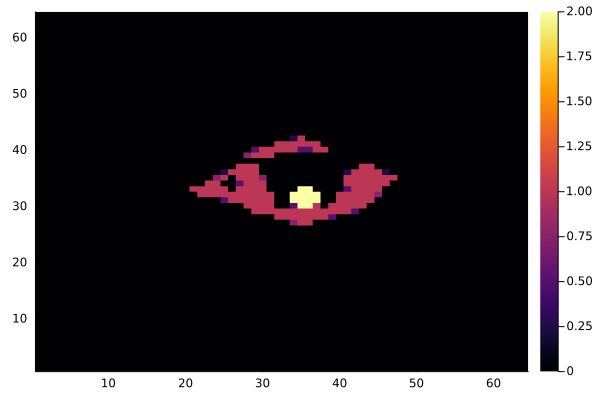

In [91]:
heatmap(temp)

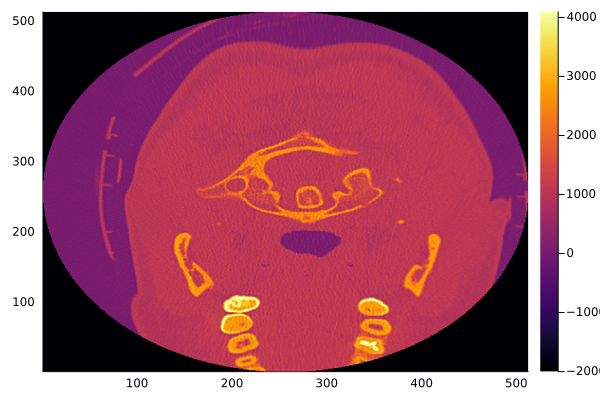

In [92]:
temp2 = dcm_parse(raw"D:\RSNA-2022-dataset\train_images\1.2.826.0.1.3680043.10921\72.dcm")
temp3 = temp2[(0x7fe0, 0x0010)]
heatmap(temp3)

Example of how to read data

In [101]:
temp4 = zeros(64,64,53)
read!(raw"G:\桌面\2022 Fall\cs284A\Project\Compressed_data\segmentations\1.2.826.0.1.3680043.10633.nii.txt", temp4)

64×64×53 Array{Float64, 3}:
[:, :, 1] =
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0

In [10]:
y = zeros(43,64,64);

In [11]:
read!(raw"G:\桌面\2022 Fall\cs284A\Project\Compressed_data\train_images\1.2.826.0.1.3680043.18906\27.txt", y)

LoadError: EOFError: read end of file